In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# load the Concrete dataset 

Airline= pd.read_csv(r"C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\Project\Airline Satisfaction/Invistico_Airline.csv", header=0)

# copy the file to back-up file

Airline_bk = Airline.copy()

# display first 5 records

Airline.head()    

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
Airline_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       49999 non-null  object 
 1   Gender                             49999 non-null  object 
 2   Customer Type                      49999 non-null  object 
 3   Age                                49999 non-null  int64  
 4   Type of Travel                     49999 non-null  object 
 5   Class                              49999 non-null  object 
 6   Flight Distance                    49999 non-null  int64  
 7   Seat comfort                       49999 non-null  int64  
 8   Departure/Arrival time convenient  49999 non-null  int64  
 9   Food and drink                     49999 non-null  int64  
 10  Gate location                      49999 non-null  int64  
 11  Inflight wifi service              49999 non-null  int

In [5]:
Airline_bk.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             167
dtype: int64

In [6]:
# Using KNN Imputer to address the Driver_Age missing values

# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan,)

# Fill the missing values for 'Driver_Age'

Airline_bk['Arrival Delay in Minutes'] = imputer_int.fit_transform(Airline_bk[['Arrival Delay in Minutes']])

Airline_bk

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,dissatisfied,Female,disloyal Customer,18,Business travel,Eco,2115,2,4,2,3,3,2,3,3,3,5,4,2,3,3,2,0.0
49995,dissatisfied,Female,disloyal Customer,25,Business travel,Business,2672,2,4,2,3,5,2,3,5,4,4,4,4,4,5,9,0.0
49996,dissatisfied,Male,disloyal Customer,36,Business travel,Eco,1981,2,4,2,3,5,2,5,5,5,3,5,1,2,5,127,121.0
49997,dissatisfied,Male,disloyal Customer,26,Business travel,Eco,1662,2,4,2,3,5,2,5,5,1,1,5,4,1,5,0,0.0


In [7]:
for i in Airline_bk.columns:
    print(i+":")
    print(Airline_bk[i].value_counts())

satisfaction:
dissatisfied    30332
satisfied       19667
Name: satisfaction, dtype: int64
Gender:
Female    25518
Male      24481
Name: Gender, dtype: int64
Customer Type:
Loyal Customer       39981
disloyal Customer    10018
Name: Customer Type, dtype: int64
Age:
25    1344
26    1252
23    1211
27    1192
22    1133
      ... 
75       4
74       3
71       2
78       1
73       1
Name: Age, Length: 74, dtype: int64
Type of Travel:
Personal Travel    39981
Business travel    10018
Name: Type of Travel, dtype: int64
Class:
Eco         38867
Business     6165
Eco Plus     4967
Name: Class, dtype: int64
Flight Distance:
2054    47
1984    45
1960    44
1981    44
2114    43
        ..
4441     1
3966     1
3060     1
4141     1
4003     1
Name: Flight Distance, Length: 4160, dtype: int64
Seat comfort:
2    13791
4     9968
1     9546
3     9066
5     5078
0     2550
Name: Seat comfort, dtype: int64
Departure/Arrival time convenient:
4    12451
5    11786
2     9010
1     7469
3     637

In [8]:
Airline_bk.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = Airline_bk.satisfaction.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total HS Trans:', len(Airline_bk))

print("The Dataset is already Balanced")

Class 0: 30332
Class 1: 19667
Proportion: 1.54 : 1
Total HS Trans: 49999
The Dataset is already Balanced


In [10]:
Airline_bk.shape

(49999, 23)

In [11]:
cols5=['Flight Distance','Departure Delay in Minutes','Age','Arrival Delay in Minutes']
i=list()
for col in cols5:
    UL=round(Airline_bk[col].mean() + 3*Airline_bk[col].std(),3)
    LL=round(Airline_bk[col].mean() - 3*Airline_bk[col].std(),3)
    i.extend(Airline_bk.index[(Airline_bk[col]<LL) | (Airline_bk[col]>UL)])
i=sorted(i)
Airline_bk=Airline_bk.drop(i)

In [12]:
Airline_bk.shape

(48671, 23)

In [13]:
cols=['satisfaction','Gender','Customer Type','Type of Travel','Class']

In [14]:
from sklearn.preprocessing import LabelEncoder
LB_Encdr=LabelEncoder()
for col in cols:
    Airline_bk[col]=LB_Encdr.fit_transform(Airline_bk[col])
    

In [15]:
cols1=['Flight Distance','Departure Delay in Minutes','Age','Arrival Delay in Minutes']

In [16]:
y=Airline_bk['satisfaction']
x=Airline_bk.drop(['satisfaction'],axis=1)

In [56]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((34069, 22), (14602, 22), (34069,), (14602,))

In [57]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [58]:
#Logistic Regression

Confusion matrix : 
 [[4918  960]
 [ 783 7941]]
Outcome values : 
 4918 960 783 7941
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.84      0.85      5878
           0       0.89      0.91      0.90      8724

    accuracy                           0.88     14602
   macro avg       0.88      0.87      0.88     14602
weighted avg       0.88      0.88      0.88     14602

Accuracy : 88.1 %
Precision : 86.3 %
Recall : 83.7 %
F1 Score : 0.849
Specificity or True Negative Rate : 91.0 %
Balanced Accuracy : 87.4 %
MCC : 0.751
roc_auc_score: 0.873


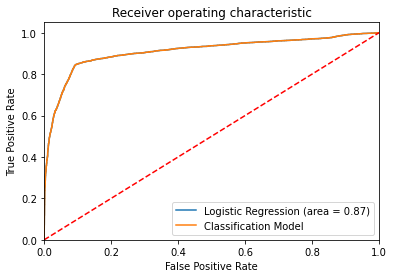

-----------------------------------------------------------------------------------------------------


In [59]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model
#these are the default parameters, these are passed by default without mentioning

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                             class_weight=None,random_state=None, solver='lbfgs', max_iter=100, multi_class='auto',
                             verbose=0, warm_start=False,n_jobs=None, l1_ratio=None)

# Train the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)      
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')


In [60]:
#Decision Tree

Confusion matrix : 
 [[5455  423]
 [ 513 8211]]
Outcome values : 
 5455 423 513 8211
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.93      0.92      5878
           0       0.95      0.94      0.95      8724

    accuracy                           0.94     14602
   macro avg       0.93      0.93      0.93     14602
weighted avg       0.94      0.94      0.94     14602

Accuracy : 93.6 %
Precision : 91.4 %
Recall : 92.8 %
F1 Score : 0.921
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 93.4 %
MCC : 0.867
roc_auc_score: 0.935


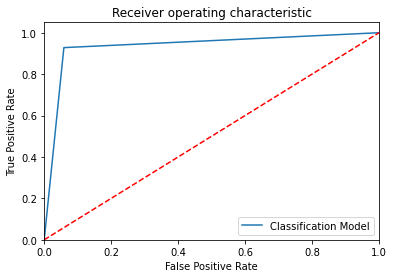

-----------------------------------------------------------------------------------------------------


In [61]:
# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

CustChurnDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None,
                                     max_leaf_nodes=None, min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                     random_state=None, splitter='best')

# Train the model with train data 

CustChurnDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CustChurnDT.predict(x_test)
y_pred_prob = CustChurnDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, CustChurnDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [62]:
#Random Forest


Model: Random Forest
Confusion matrix : 
 [[5432  446]
 [ 189 8535]]
Outcome values : 
 5432 446 189 8535
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.94      5878
           0       0.95      0.98      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.7 %
Precision : 96.6 %
Recall : 92.4 %
F1 Score : 0.945
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 95.1 %
MCC : 0.91
roc_auc_score: 0.951


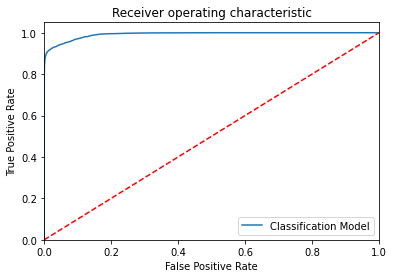

-----------------------------------------------------------------------------------------------------


In [64]:
# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier()

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix
print("Model: Random Forest")
matrix = confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual, predicted, labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [38]:
#Extra Trees

Model: Extra Trees
Confusion matrix : 
 [[5472  406]
 [ 219 8505]]
Outcome values : 
 5472 406 219 8505
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      5878
           0       0.95      0.97      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.96     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.7 %
Precision : 96.2 %
Recall : 93.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 95.3 %
MCC : 0.911
roc_auc_score: 0.953


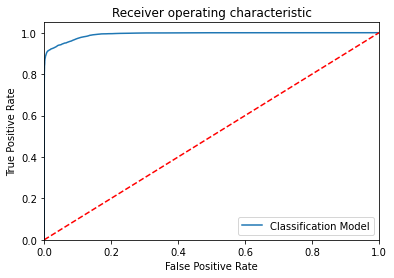

-----------------------------------------------------------------------------------------------------


In [26]:

# Build the Calssification models with Over Sampling and compare the results
import matplotlib.pyplot as plt 

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0,max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                               bootstrap=False, oob_score=False, n_jobs=None,random_state=None, verbose=0, warm_start=False,
                               class_weight=None, ccp_alpha=0.0, max_samples=None)


  
    
ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix
print("Model: Extra Trees")
matrix = confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual, predicted, labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [40]:
#KNN Algo

In [46]:
KNN_Results=pd.read_csv(r"C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\day 9\KNN_Results.csv")

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[5281  597]
 [ 593 8131]]
Outcome values : 
 5281 597 593 8131
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90      5878
           0       0.93      0.93      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.92      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.9 %
Precision : 89.9 %
Recall : 89.8 %
F1 Score : 0.899
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 91.5 %
MCC : 0.831
roc_auc_score: 0.915


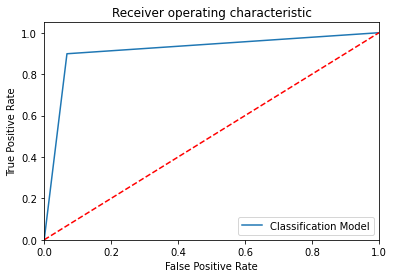

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[4806 1072]
 [ 232 8492]]
Outcome values : 
 4806 1072 232 8492
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.82      0.88      5878
           0       0.89      0.97      0.93      8724

    accuracy                           0.91     14602
   macro avg       0.92      0.90      0.90     14602
weighted avg       0.91      0.91      0.91     14602

Accuracy : 91.1 %
Precision : 95.4 %
Recall : 81.8 %
F1 Score : 0.881
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 89.6 %
MCC : 0.816
roc_auc_score: 0.896


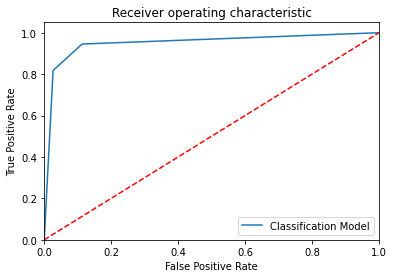

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[5184  694]
 [ 461 8263]]
Outcome values : 
 5184 694 461 8263
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      5878
           0       0.92      0.95      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.1 %
Precision : 91.8 %
Recall : 88.2 %
F1 Score : 0.9
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 91.4 %
MCC : 0.835
roc_auc_score: 0.915


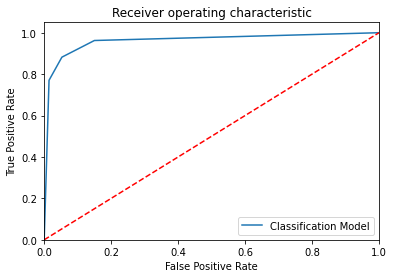

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[4950  928]
 [ 263 8461]]
Outcome values : 
 4950 928 263 8461
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.84      0.89      5878
           0       0.90      0.97      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.93      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.8 %
Precision : 95.0 %
Recall : 84.2 %
F1 Score : 0.893
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 90.6 %
MCC : 0.831
roc_auc_score: 0.906


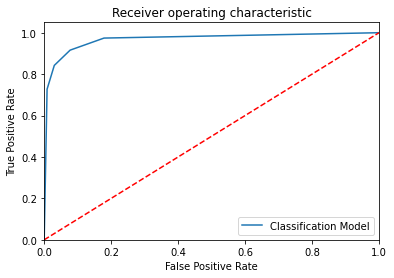

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[5172  706]
 [ 423 8301]]
Outcome values : 
 5172 706 423 8301
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      5878
           0       0.92      0.95      0.94      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.92      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.3 %
Precision : 92.4 %
Recall : 88.0 %
F1 Score : 0.902
Specificity or True Negative Rate : 95.2 %
Balanced Accuracy : 91.6 %
MCC : 0.839
roc_auc_score: 0.916


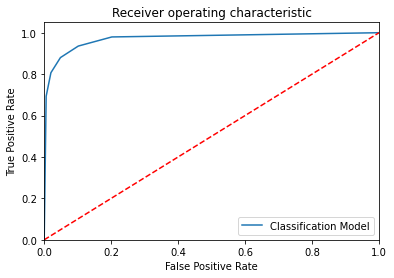

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[4992  886]
 [ 283 8441]]
Outcome values : 
 4992 886 283 8441
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.85      0.90      5878
           0       0.91      0.97      0.94      8724

    accuracy                           0.92     14602
   macro avg       0.93      0.91      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.0 %
Precision : 94.6 %
Recall : 84.9 %
F1 Score : 0.895
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 90.8 %
MCC : 0.834
roc_auc_score: 0.908


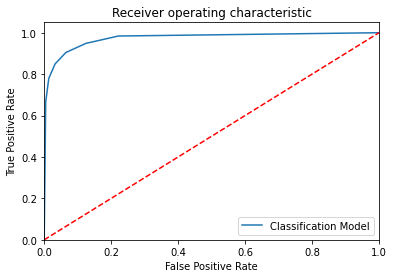

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[5137  741]
 [ 405 8319]]
Outcome values : 
 5137 741 405 8319
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.87      0.90      5878
           0       0.92      0.95      0.94      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.2 %
Precision : 92.7 %
Recall : 87.4 %
F1 Score : 0.9
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 91.4 %
MCC : 0.836
roc_auc_score: 0.914


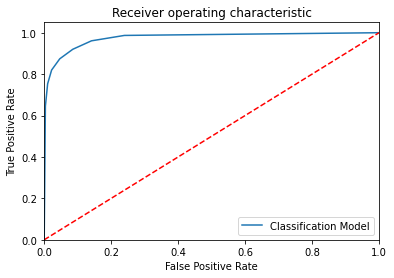

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[4993  885]
 [ 293 8431]]
Outcome values : 
 4993 885 293 8431
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      5878
           0       0.91      0.97      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.9 %
Precision : 94.5 %
Recall : 84.9 %
F1 Score : 0.894
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 90.8 %
MCC : 0.833
roc_auc_score: 0.908


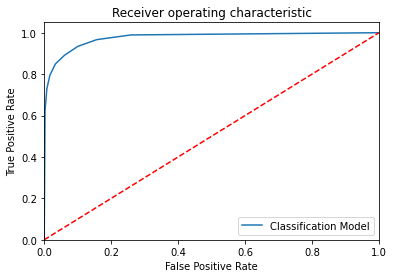

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[5103  775]
 [ 403 8321]]
Outcome values : 
 5103 775 403 8321
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.87      0.90      5878
           0       0.91      0.95      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.9 %
Precision : 92.7 %
Recall : 86.8 %
F1 Score : 0.897
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 91.1 %
MCC : 0.832
roc_auc_score: 0.911


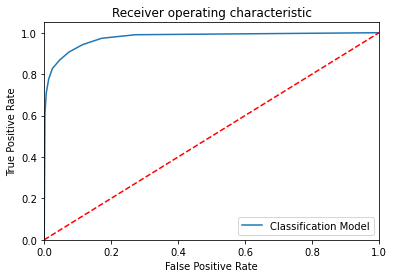

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[4985  893]
 [ 299 8425]]
Outcome values : 
 4985 893 299 8425
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      5878
           0       0.90      0.97      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.8 %
Precision : 94.3 %
Recall : 84.8 %
F1 Score : 0.893
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 90.7 %
MCC : 0.831
roc_auc_score: 0.907


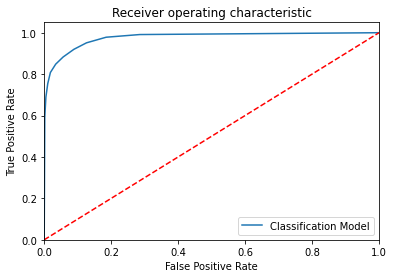

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[5076  802]
 [ 381 8343]]
Outcome values : 
 5076 802 381 8343
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.86      0.90      5878
           0       0.91      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.9 %
Precision : 93.0 %
Recall : 86.4 %
F1 Score : 0.896
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 91.0 %
MCC : 0.831
roc_auc_score: 0.91


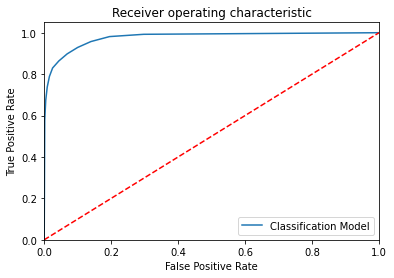

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[4979  899]
 [ 297 8427]]
Outcome values : 
 4979 899 297 8427
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      5878
           0       0.90      0.97      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.8 %
Precision : 94.4 %
Recall : 84.7 %
F1 Score : 0.893
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 90.6 %
MCC : 0.83
roc_auc_score: 0.907


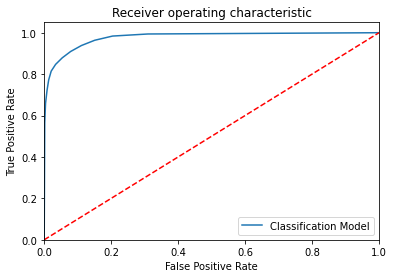

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[5072  806]
 [ 366 8358]]
Outcome values : 
 5072 806 366 8358
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.86      0.90      5878
           0       0.91      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.0 %
Precision : 93.3 %
Recall : 86.3 %
F1 Score : 0.896
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 91.0 %
MCC : 0.833
roc_auc_score: 0.91


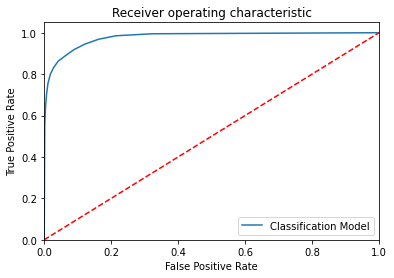

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[4975  903]
 [ 307 8417]]
Outcome values : 
 4975 903 307 8417
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      5878
           0       0.90      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.7 %
Precision : 94.2 %
Recall : 84.6 %
F1 Score : 0.892
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 90.6 %
MCC : 0.828
roc_auc_score: 0.906


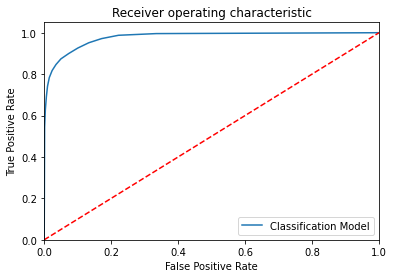

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[5035  843]
 [ 356 8368]]
Outcome values : 
 5035 843 356 8368
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.86      0.89      5878
           0       0.91      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.8 %
Precision : 93.4 %
Recall : 85.7 %
F1 Score : 0.894
Specificity or True Negative Rate : 95.9 %
Balanced Accuracy : 90.8 %
MCC : 0.829
roc_auc_score: 0.908


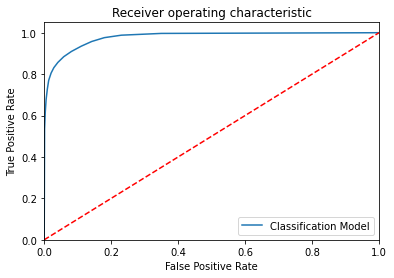

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[4962  916]
 [ 292 8432]]
Outcome values : 
 4962 916 292 8432
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.84      0.89      5878
           0       0.90      0.97      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.7 %
Precision : 94.4 %
Recall : 84.4 %
F1 Score : 0.891
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 90.6 %
MCC : 0.828
roc_auc_score: 0.905


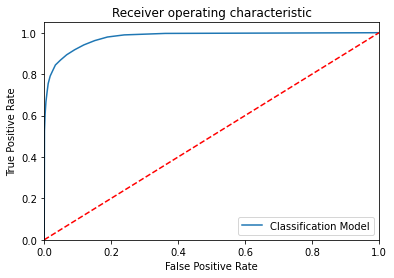

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[5017  861]
 [ 364 8360]]
Outcome values : 
 5017 861 364 8360
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.85      0.89      5878
           0       0.91      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.6 %
Precision : 93.2 %
Recall : 85.4 %
F1 Score : 0.891
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 90.6 %
MCC : 0.825
roc_auc_score: 0.906


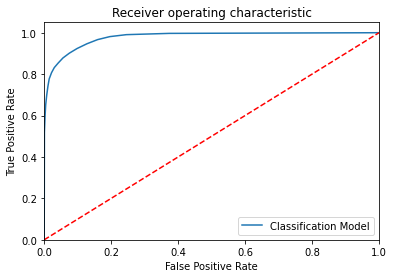

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[4961  917]
 [ 313 8411]]
Outcome values : 
 4961 917 313 8411
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.84      0.89      5878
           0       0.90      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.90      0.91     14602
weighted avg       0.92      0.92      0.91     14602

Accuracy : 91.6 %
Precision : 94.1 %
Recall : 84.4 %
F1 Score : 0.89
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 90.4 %
MCC : 0.825
roc_auc_score: 0.904


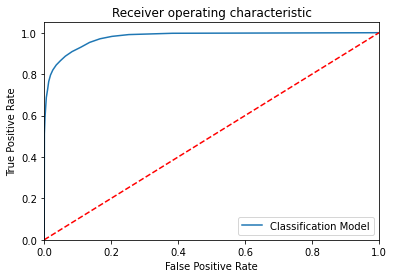

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[5020  858]
 [ 369 8355]]
Outcome values : 
 5020 858 369 8355
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.85      0.89      5878
           0       0.91      0.96      0.93      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.91      0.91     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 91.6 %
Precision : 93.2 %
Recall : 85.4 %
F1 Score : 0.891
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 90.6 %
MCC : 0.825
roc_auc_score: 0.906


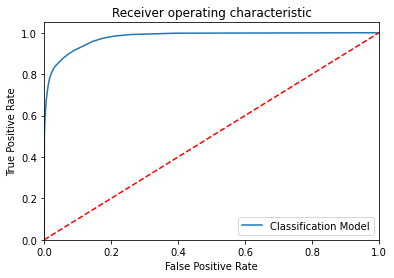

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[4954  924]
 [ 323 8401]]
Outcome values : 
 4954 924 323 8401
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.84      0.89      5878
           0       0.90      0.96      0.93      8724

    accuracy                           0.91     14602
   macro avg       0.92      0.90      0.91     14602
weighted avg       0.92      0.91      0.91     14602

Accuracy : 91.5 %
Precision : 93.9 %
Recall : 84.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 90.3 %
MCC : 0.823
roc_auc_score: 0.903


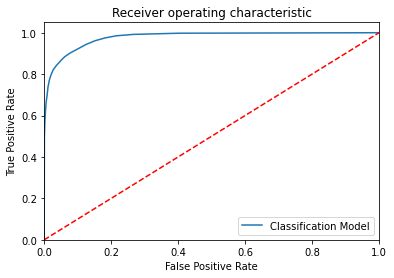

In [47]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #

In [49]:
KNN_Results.to_csv(r"C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\day 9\KNN_Results.csv")
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,5281,597,593,8131,0.919,0.899,0.898,0.899,0.932,0.831,0.915231,0.915
1,KNeighborsClassifier(n_neighbors=2),2,4806,1072,232,8492,0.911,0.954,0.818,0.881,0.973,0.816,0.895516,0.896
2,KNeighborsClassifier(n_neighbors=3),3,5184,694,461,8263,0.921,0.918,0.882,0.9,0.947,0.835,0.914545,0.914
3,KNeighborsClassifier(n_neighbors=4),4,4950,928,263,8461,0.918,0.95,0.842,0.893,0.97,0.831,0.905988,0.906
4,KNeighborsClassifier(),5,5172,706,423,8301,0.923,0.924,0.88,0.902,0.952,0.839,0.915702,0.916


In [ ]:
#GausianNB

Confusion matrix : 
 [[5168  710]
 [1351 7373]]
Outcome values : 
 5168 710 1351 7373
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83      5878
           0       0.91      0.85      0.88      8724

    accuracy                           0.86     14602
   macro avg       0.85      0.86      0.86     14602
weighted avg       0.86      0.86      0.86     14602

Accuracy : 85.9 %
Precision : 79.3 %
Recall : 87.9 %
F1 Score : 0.834
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.2 %
MCC : 0.715
roc_auc_score: 0.862


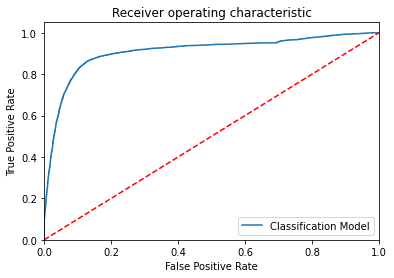

-----------------------------------------------------------------------------------------------------


In [45]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [ ]:
#XGB

Confusion matrix : 
 [[5412  466]
 [ 287 8437]]
Outcome values : 
 5412 466 287 8437
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.92      0.93      5878
           0       0.95      0.97      0.96      8724

    accuracy                           0.95     14602
   macro avg       0.95      0.94      0.95     14602
weighted avg       0.95      0.95      0.95     14602

Accuracy : 94.8 %
Precision : 95.0 %
Recall : 92.1 %
F1 Score : 0.935
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 94.4 %
MCC : 0.893
roc_auc_score: 0.944


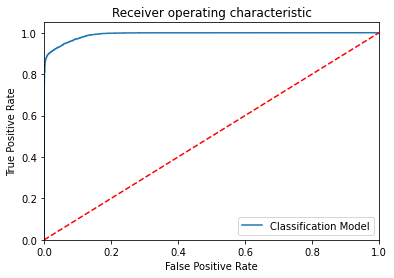

-----------------------------------------------------------------------------------------------------


In [44]:
# Training the XGB Classifier model on the Training set

from xgboost import XGBClassifier

# Build the model

modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#modelXGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
#                         colsample_bytree=1, eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type='gain',
#                         interaction_constraints='', learning_rate=0.300000012, max_delta_step=0, max_depth=6, 
#                         min_child_weight=1, missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=16,
#                         num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, 
#                         scale_pos_weight=None, subsample=1, tree_method='exact', use_label_encoder=False, 
#                         validate_parameters=1, verbosity=None)

# Fit the model with train data

modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelXGB.predict(x_test)
y_pred_prob = modelXGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelXGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [42]:
#LGB

Model: LightGBM
Confusion matrix : 
 [[5341  537]
 [ 137 8587]]
Outcome values : 
 5341 537 137 8587
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94      5878
           0       0.94      0.98      0.96      8724

    accuracy                           0.95     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.95      0.95      0.95     14602

Accuracy : 95.4 %
Precision : 97.5 %
Recall : 90.9 %
F1 Score : 0.941
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.6 %
MCC : 0.904
roc_auc_score: 0.946


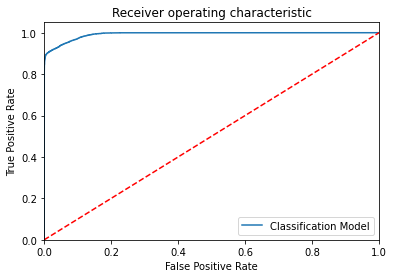

-----------------------------------------------------------------------------------------------------


In [27]:
# Training the lightgbm model on the Training set

import lightgbm as lgb

# Build the model

modelLGB = lgb.LGBMClassifier()

# Fit the model with train data

modelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelLGB.predict(x_test)
y_pred_prob = modelLGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix
print("Model: LightGBM")
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelLGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Confusion matrix : 
 [[5341  537]
 [ 137 8587]]
Outcome values : 
 5341 537 137 8587
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94      5878
           0       0.94      0.98      0.96      8724

    accuracy                           0.95     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.95      0.95      0.95     14602

Accuracy : 95.4 %
Precision : 97.5 %
Recall : 90.9 %
F1 Score : 0.941
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.6 %
MCC : 0.904
roc_auc_score: 0.946


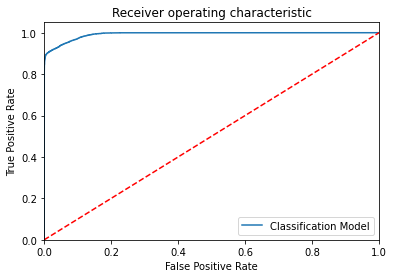

In [66]:
from sklearn.ensemble import BaggingClassifier
ModelBAG=BaggingClassifier(base_estimator=None,n_estimators=100,max_samples=1.0,max_features=1.0,bootstrap=True,bootstrap_features=False,oob_score=False,warm_start=False,n_jobs=None, random_state=None, verbose=0)
modelLGB.fit(x_train,y_train)
y_pred = modelLGB.predict(x_test)
y_pred_prob = modelLGB.predict_proba(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = y_test
predicted = y_pred
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelLGB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 


Confusion matrix : 
 [[5341  537]
 [ 137 8587]]
Outcome values : 
 5341 537 137 8587
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94      5878
           0       0.94      0.98      0.96      8724

    accuracy                           0.95     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.95      0.95      0.95     14602

Accuracy : 95.4 %
Precision : 97.5 %
Recall : 90.9 %
F1 Score : 0.941
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.6 %
MCC : 0.904
roc_auc_score: 0.946


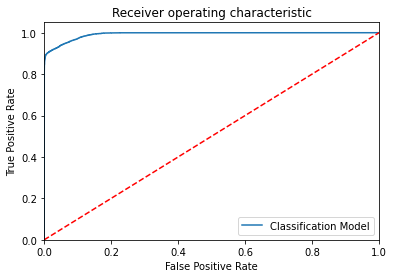

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
modelLGB.fit(x_train,y_train)
y_pred = modelLGB.predict(x_test)
y_pred_prob = modelLGB.predict_proba(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = y_test
predicted = y_pred
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
C_Report = classification_report(actual,predicted,labels=[1,0]) 
print('Classification report : \n', C_Report)
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelLGB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 


In [26]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\day 6\HTResults.csv", header=0)
EMResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[4918  960]
 [ 783 7941]]
Outcome values : 
 4918 960 783 7941
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.84      0.85      5878
           0       0.89      0.91      0.90      8724

    accuracy                           0.88     14602
   macro avg       0.88      0.87      0.88     14602
weighted avg       0.88      0.88      0.88     14602

Accuracy : 88.1 %
Precision : 86.3 %
Recall : 83.7 %
F1 Score : 0.849
Specificity or True Negative Rate : 91.0 %
Balanced Accuracy : 87.4 %
MCC : 0.751
roc_auc_score: 0.873


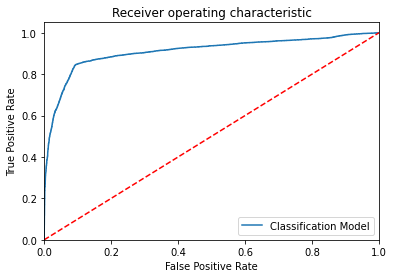

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[5430  448]
 [ 506 8218]]
Outcome values : 
 5430 448 506 8218
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.92      0.92      5878
           0       0.95      0.94      0.95      8724

    accuracy                           0.93     14602
   macro avg       0.93      0.93      0.93     14602
weighted avg       0.93      0.93      0.93     14602

Accuracy : 93.5 %
Precision : 91.5 %
Recall : 92.4 %
F1 Score : 0.919
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 93.3 %
MCC : 0.864
roc_auc_score: 0.933


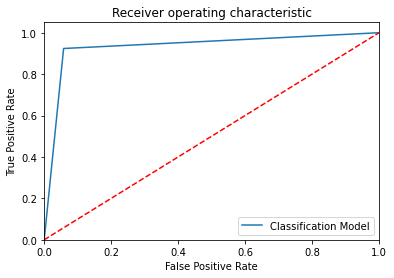

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[5430  448]
 [ 194 8530]]
Outcome values : 
 5430 448 194 8530
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.94      5878
           0       0.95      0.98      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.6 %
Precision : 96.6 %
Recall : 92.4 %
F1 Score : 0.944
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 95.1 %
MCC : 0.909
roc_auc_score: 0.951


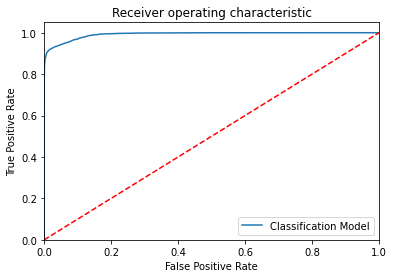

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[5462  416]
 [ 209 8515]]
Outcome values : 
 5462 416 209 8515
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      5878
           0       0.95      0.98      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.96     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.7 %
Precision : 96.3 %
Recall : 92.9 %
F1 Score : 0.946
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 95.2 %
MCC : 0.911
roc_auc_score: 0.953


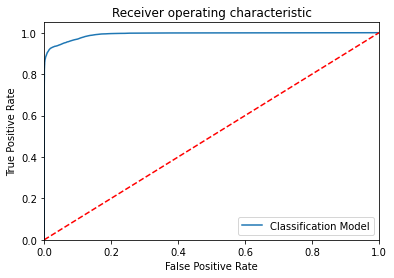

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[5172  706]
 [ 423 8301]]
Outcome values : 
 5172 706 423 8301
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      5878
           0       0.92      0.95      0.94      8724

    accuracy                           0.92     14602
   macro avg       0.92      0.92      0.92     14602
weighted avg       0.92      0.92      0.92     14602

Accuracy : 92.3 %
Precision : 92.4 %
Recall : 88.0 %
F1 Score : 0.902
Specificity or True Negative Rate : 95.2 %
Balanced Accuracy : 91.6 %
MCC : 0.839
roc_auc_score: 0.916


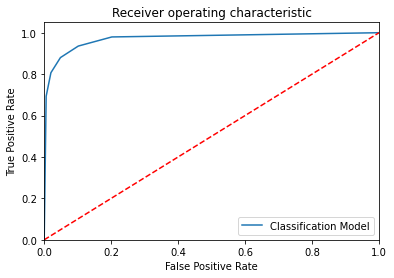

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[5168  710]
 [1351 7373]]
Outcome values : 
 5168 710 1351 7373
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83      5878
           0       0.91      0.85      0.88      8724

    accuracy                           0.86     14602
   macro avg       0.85      0.86      0.86     14602
weighted avg       0.86      0.86      0.86     14602

Accuracy : 85.9 %
Precision : 79.3 %
Recall : 87.9 %
F1 Score : 0.834
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.2 %
MCC : 0.715
roc_auc_score: 0.862


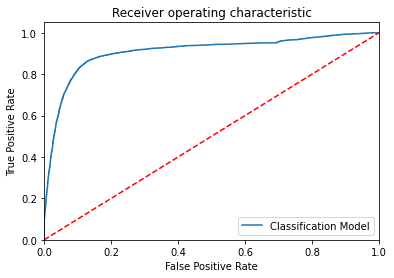

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[5412  466]
 [ 287 8437]]
Outcome values : 
 5412 466 287 8437
Classification report : 
               precision    recall  f1-score   support



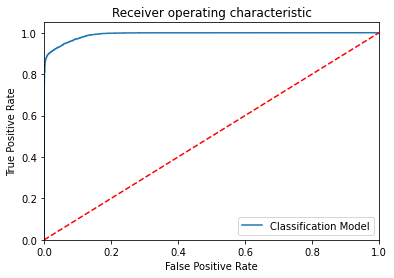

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[5341  537]
 [ 137 8587]]
Outcome values : 
 5341 537 137 8587
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94      5878
           0       0.94      0.98      0.96      8724

    accuracy                           0.95     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.95      0.95      0.95     14602

Accuracy : 95.4 %
Precision : 97.5 %
Recall : 90.9 %
F1 Score : 0.941
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 94.6 %
MCC : 0.904
roc_auc_score: 0.946


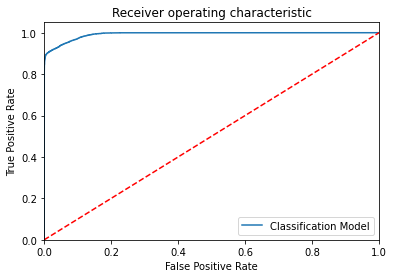

-----------------------------------------------------------------------------------------------------


In [27]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')

ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB, ModelLGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [28]:
# Results with comparing the all the algorithms 

#CSResults.to_csv("C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\day 11/CSResults_22.csv")

EMResults.head(20)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4918,960,783,7941,0.881,0.863,0.837,0.849,0.91,0.751,0.873463,0.874
1,DecisionTreeClassifier(),5430,448,506,8218,0.935,0.915,0.924,0.919,0.942,0.864,0.932891,0.933
2,"(DecisionTreeClassifier(max_features='sqrt', r...",5430,448,194,8530,0.956,0.966,0.924,0.944,0.978,0.909,0.950773,0.951
3,"(ExtraTreeClassifier(random_state=651148473), ...",5462,416,209,8515,0.957,0.963,0.929,0.946,0.976,0.911,0.952635,0.952
4,KNeighborsClassifier(),5172,706,423,8301,0.923,0.924,0.88,0.902,0.952,0.839,0.915702,0.916
5,GaussianNB(),5168,710,1351,7373,0.859,0.793,0.879,0.834,0.845,0.715,0.862175,0.862
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",5412,466,287,8437,0.948,0.95,0.921,0.935,0.967,0.893,0.943912,0.944
7,LGBMClassifier(),5341,537,137,8587,0.954,0.975,0.909,0.941,0.984,0.904,0.946469,0.946


In [25]:
HTResults=pd.read_csv(r"C:\Users\Lakshman\OneDrive\Documents\AI&ML_DS Internship\day 6/HTResults.csv")

In [26]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [27]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 500}

In [28]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='auto',
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=500)

Confusion matrix : 
 [[5412  466]
 [ 178 8546]]
Outcome values : 
 5412 466 178 8546
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.94      5878
           0       0.95      0.98      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.95     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.6 %
Precision : 96.8 %
Recall : 92.1 %
F1 Score : 0.944
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 95.0 %
MCC : 0.908
roc_auc_score: 0.95


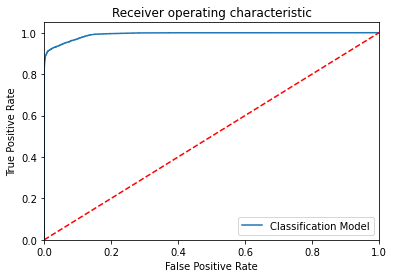

-----------------------------------------------------------------------------------------------------


In [29]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with gridseachCV

from sklearn.ensemble import RandomForestClassifier

ModelRF3 = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15, min_samples_split=6,
                                  min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF3.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF3.predict(x_test)
y_pred_prob = ModelRF3.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF3.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF3,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [30]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [31]:
# Create model object

ModelET = ExtraTreesClassifier()

ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelET_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [32]:
# best or the optimal values of the parameters for which the model performed the best

ModelET_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

Confusion matrix : 
 [[5452  426]
 [ 197 8527]]
Outcome values : 
 5452 426 197 8527
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95      5878
           0       0.95      0.98      0.96      8724

    accuracy                           0.96     14602
   macro avg       0.96      0.95      0.96     14602
weighted avg       0.96      0.96      0.96     14602

Accuracy : 95.7 %
Precision : 96.5 %
Recall : 92.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 95.2 %
MCC : 0.911
roc_auc_score: 0.952


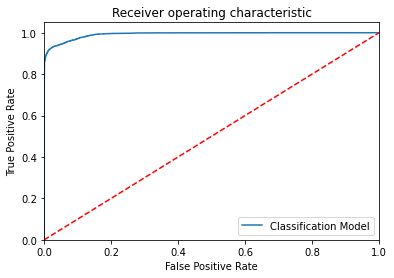

-----------------------------------------------------------------------------------------------------


In [33]:
# To build the 'ExtraTreesClassifier' model with random sampling with Hyperparameter tuning with RandomizedSearchCV

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=800, criterion='entropy', max_depth=560, min_samples_split=5, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------